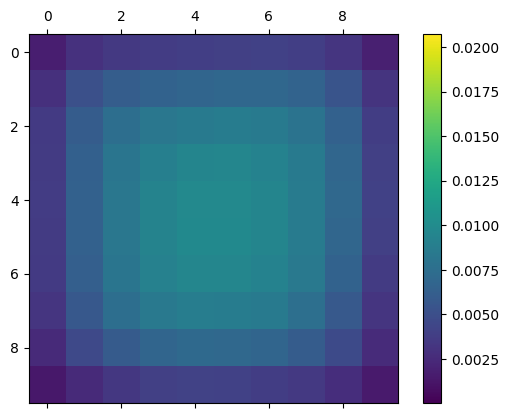

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

def get_neighbors(i, j, M, N):
    neighbors = []
    for di in [-1, 0, 1]:
        for dj in [-1, 0, 1]:
            if di == 0 and dj == 0:
                continue
            ni, nj = i + di, j + dj
            if 0 <= ni < M and 0 <= nj < N:
                neighbors.append((ni, nj))
    return neighbors

def simulate_diffusion(M, N, T, u0, K):
    u = np.array(u0)
    history = [u.copy()]
    
    for t in range(T):
        u_new = u.copy()
        for i in range(M):
            for j in range(N):
                neighbors = get_neighbors(i, j, M, N)
                diffusion_sum = sum(u[ni, nj] for ni, nj in neighbors)
                u_new[i, j] = (1 - K) * u[i, j] + (K / 8) * diffusion_sum
        u = u_new
        history.append(u.copy())
    
    return history

def plot_diffusion(history, save_path=None):
    fig, ax = plt.subplots()
    cax = ax.matshow(history[0], cmap='viridis')
    fig.colorbar(cax)

    def update(frame):
        cax.set_array(history[frame])
        return cax,

    ani = FuncAnimation(fig, update, frames=len(history), blit=True)
    
    if save_path:
        writer = FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=1800)
        ani.save(save_path, writer=writer)
    else:
        plt.show()

# Example usage
M, N = 10, 10
T = 50
u0 = np.random.rand(M, N)
u0 /= u0.sum()  # Normalize to sum to 1
K = 0.1

history = simulate_diffusion(M, N, T, u0, K)
plot_diffusion(history, save_path='diffusion_simulation.mp4')